In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as splitter
from sklearn.preprocessing   import LabelEncoder as labeler
from sklearn import metrics
from sklearn import svm
from sklearn import tree

In [2]:
Dataframe = pd.read_csv("heart.csv")

In [3]:
Dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [4]:
Dataframe.columns = ['나이', '성별', '가슴 통증 유형', '안정 혈압 (mmHg)', '혈청 콜레스테롤 (mg/dl)', 
                     '공복 혈당 > 120 mg/dl', '안정 심전도 결과 (0, 1, 2)', '최대 심박동수', 
                     '협심증 유발 운동', '운동에 의해 유발된 ST Depression', 
                     '최대 운동 ST Segment의 기울기', '형광 투시된 주요 혈관의 수 (0-3)', 
                     '심장 결함 종류',  '심장병 진단']

In [5]:
Dataframe.head()

,나이,성별,가슴 통증 유형,안정 혈압 (mmHg),혈청 콜레스테롤 (mg/dl),공복 혈당 > 120 mg/dl,"안정 심전도 결과 (0, 1, 2)",최대 심박동수,협심증 유발 운동,운동에 의해 유발된 ST Depression,최대 운동 ST Segment의 기울기,형광 투시된 주요 혈관의 수 (0-3),심장 결함 종류,심장병 진단
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [6]:
for column in Dataframe.columns:
    if Dataframe[column].dtype == type(object):
        l = labeler()
        Dataframe[column] = l.fit_transform(Dataframe[column])

In [7]:
Xtrain, Xcheck, Ytrain, Ycheck = splitter(Dataframe.iloc[:, 0:-1], Dataframe.iloc[:, -1],
                                          test_size = 0.5, random_state = 100)

In [8]:
clf = svm.SVC(gamma = 1.0)
clf.fit(Xtrain, Ytrain)
Ypredict = clf.predict(Xcheck)
print("accuracy: ", metrics.accuracy_score(Ycheck, Ypredict))

accuracy:  0.7894736842105263


In [9]:
clf = tree.DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain)
Ypredict = clf.predict(Xcheck)
print("accuracy: ", metrics.accuracy_score(Ycheck, Ypredict))

accuracy:  0.7631578947368421


In [10]:
import graphviz

In [11]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = Dataframe.columns[:-1], 
                                class_names = ["Negative", "Positive"])

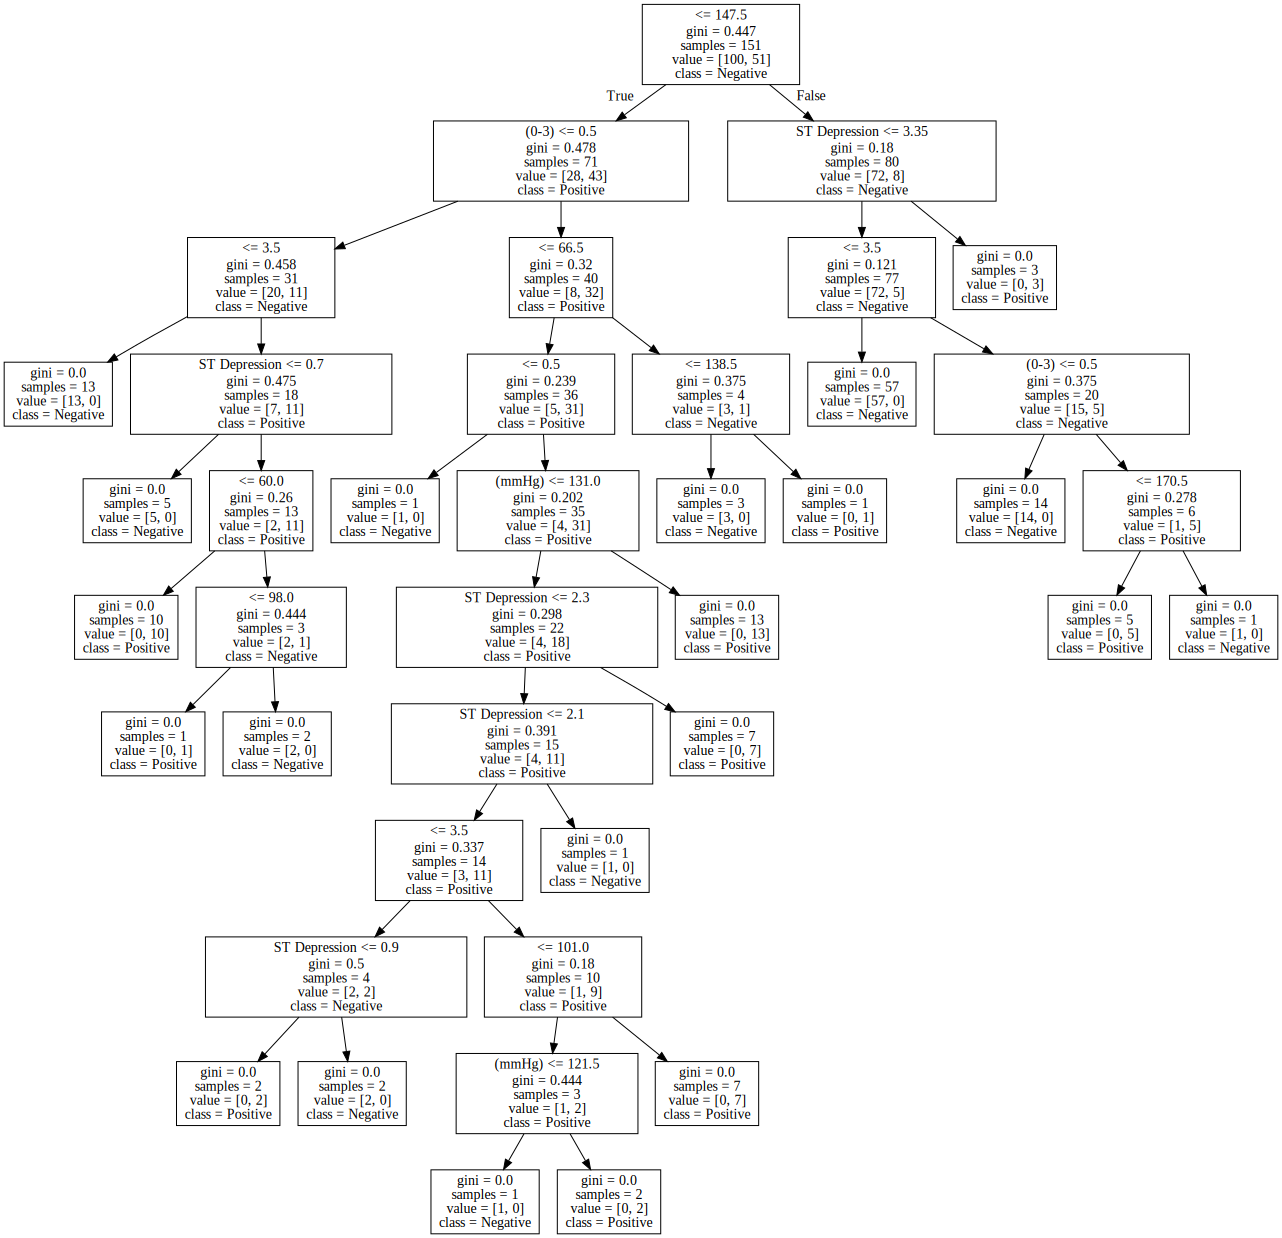

In [12]:
graph = graphviz.Source(dot_data)
graph